# **Librerías**

In [649]:
# Librerías base
import os
import warnings

import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt

# Configuración general
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", "{:,.4f}".format)

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

# Rutas del proyecto

BASE_DIR = os.getcwd()  # carpeta donde está el notebook (Clasificacion)

PROJECT_DIR = os.path.abspath(os.path.join(BASE_DIR, ".."))  # Tarea_Academica_1

DATASET_DIR = os.path.join(PROJECT_DIR, "Datasets")
FIGURES_DIR = os.path.join(PROJECT_DIR, "Graficos")

os.makedirs(FIGURES_DIR, exist_ok=True)

print("Notebook dir (BASE_DIR):", BASE_DIR)
print("Proyecto (PROJECT_DIR):", PROJECT_DIR)
print("Datasets:", DATASET_DIR)
print("Graficos:", FIGURES_DIR)


Notebook dir (BASE_DIR): c:\Users\aaron\OneDrive\Documentos\GitHub\Machine-Learning-para-Finanzas_2026_0\Grupo09\Tarea Académica 1\Clasificacion
Proyecto (PROJECT_DIR): c:\Users\aaron\OneDrive\Documentos\GitHub\Machine-Learning-para-Finanzas_2026_0\Grupo09\Tarea Académica 1
Datasets: c:\Users\aaron\OneDrive\Documentos\GitHub\Machine-Learning-para-Finanzas_2026_0\Grupo09\Tarea Académica 1\Datasets
Graficos: c:\Users\aaron\OneDrive\Documentos\GitHub\Machine-Learning-para-Finanzas_2026_0\Grupo09\Tarea Académica 1\Graficos


In [650]:
# Función auxiliar para guardar figuras automáticamente


def save_fig(fig_name: str, tight_layout: bool = True, dpi: int = 300) -> str:
    """
    Guarda el gráfico actual (plt) en la carpeta 'Graficos/'.

    Parameters
    ----------
    fig_name : str
        Nombre del archivo. Ej: '01_target_distribution.png'
    tight_layout : bool
        Ajusta layout antes de guardar.
    dpi : int
        Resolución del archivo.

    Returns
    -------
    str
        Ruta absoluta donde se guardó la figura.
    """
    if tight_layout:
        plt.tight_layout()
    path = os.path.join(FIGURES_DIR, fig_name)
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    return path

# **Importación de Datos**

In [651]:
# Importación del dataset (Clasificación)

# Nombre del archivo
DATA_FILE = "lending_dataset.xlsx"

# Ruta completa
data_path = os.path.join(DATASET_DIR, DATA_FILE)

# Lectura del Excel
df = pd.read_excel(data_path)

# Vista rápida inicial
print("Dimensión del dataset:", df.shape)
display(df.head(10))


Dimensión del dataset: (19908, 20)


,index,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,revol_util,application_type,pub_rec_bankruptcies
0,1,2400,36,15.9600,84.3300,C,NaN,10+ years,RENT,"12,252.0000",Not Verified,Fully Paid,s,small_business,IL,8.7200,0.0000,98.5000,Individual,0.0000
1,2,10000,36,13.4900,339.3100,C,AIR RESOURCES BOARD,10+ years,RENT,"49,200.0000",Source Verified,Fully Paid,s,other,CA,20.0000,0.0000,21.0000,Individual,0.0000
2,3,3000,36,18.6400,109.4300,E,MKC Accounting,9 years,RENT,"48,000.0000",Source Verified,Fully Paid,s,car,CA,5.3500,0.0000,87.5000,Individual,0.0000
3,4,5600,60,21.2800,152.3900,F,NaN,4 years,OWN,"40,000.0000",Source Verified,Charged Off,s,small_business,CA,5.5500,0.0000,32.6000,Individual,0.0000
4,5,5375,60,12.6900,121.4500,B,Starbucks,< 1 year,RENT,"15,000.0000",Verified,Charged Off,s,other,TX,18.0800,0.0000,36.5000,Individual,0.0000
5,6,12000,36,12.6900,402.5400,B,UCLA,10+ years,OWN,"75,000.0000",Source Verified,Fully Paid,s,debt_consolidation,CA,10.7800,0.0000,67.1000,Individual,0.0000
6,7,3000,36,9.9100,96.6800,B,Target,3 years,RENT,"15,000.0000",Source Verified,Fully Paid,s,credit_card,IL,12.5600,0.0000,43.1000,Individual,0.0000
7,8,10000,36,10.6500,325.7400,B,SFMTA,3 years,RENT,"100,000.0000",Source Verified,Charged Off,s,other,CA,7.0600,0.0000,55.5000,Individual,0.0000
8,9,10000,36,15.2700,347.9800,C,Chin's Restaurant,4 years,RENT,"42,000.0000",Not Verified,Fully Paid,s,home_improvement,CA,18.6000,0.0000,70.2000,Individual,0.0000
9,10,9200,36,6.0300,280.0100,A,Network Interpreting Service,6 years,RENT,"77,385.0000",Not Verified,Fully Paid,s,debt_consolidation,CA,9.8600,0.0000,23.1000,Individual,0.0000


In [652]:

# Renombrar variables para mayor claridad 

rename_dict = {
    "loan_amnt": "monto_prestamo",
    "term": "plazo_meses",
    "int_rate": "tasa_interes",
    "installment": "cuota_mensual",
    "grade": "grado_crediticio",

    "emp_title": "ocupacion",
    "emp_length": "antiguedad_laboral",
    "home_ownership": "tenencia_vivienda",
    "annual_inc": "ingreso_anual",
    "verification_status": "verificacion_ingresos",

    "loan_status": "estado_prestamo",

    "pymnt_plan": "plan_pago",
    "purpose": "proposito_prestamo",
    "addr_state": "estado_residencia",

    "dti": "ratio_deuda_ingreso",
    "delinq_2yrs": "moras_ultimos_2y",
    "revol_util": "utilizacion_revolvente",
    "pub_rec_bankruptcies": "bancarrotas_publicas",

    "application_type": "tipo_solicitud"
}

# Aplicar renombramiento
df = df.rename(columns=rename_dict)

print("Columnas renombradas correctamente.")
display(df.head())


Columnas renombradas correctamente.


,index,monto_prestamo,plazo_meses,tasa_interes,cuota_mensual,grado_crediticio,ocupacion,antiguedad_laboral,tenencia_vivienda,ingreso_anual,verificacion_ingresos,estado_prestamo,plan_pago,proposito_prestamo,estado_residencia,ratio_deuda_ingreso,moras_ultimos_2y,utilizacion_revolvente,tipo_solicitud,bancarrotas_publicas
0,1,2400,36,15.9600,84.3300,C,NaN,10+ years,RENT,"12,252.0000",Not Verified,Fully Paid,s,small_business,IL,8.7200,0.0000,98.5000,Individual,0.0000
1,2,10000,36,13.4900,339.3100,C,AIR RESOURCES BOARD,10+ years,RENT,"49,200.0000",Source Verified,Fully Paid,s,other,CA,20.0000,0.0000,21.0000,Individual,0.0000
2,3,3000,36,18.6400,109.4300,E,MKC Accounting,9 years,RENT,"48,000.0000",Source Verified,Fully Paid,s,car,CA,5.3500,0.0000,87.5000,Individual,0.0000
3,4,5600,60,21.2800,152.3900,F,NaN,4 years,OWN,"40,000.0000",Source Verified,Charged Off,s,small_business,CA,5.5500,0.0000,32.6000,Individual,0.0000
4,5,5375,60,12.6900,121.4500,B,Starbucks,< 1 year,RENT,"15,000.0000",Verified,Charged Off,s,other,TX,18.0800,0.0000,36.5000,Individual,0.0000


# **Identificación y separación de columnas**

In [653]:
# Variable objetivo (Clasificación)
TARGET = "estado_prestamo"

# Separar predictors (X) y target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print("Target:", TARGET)
print("Clases del target:", y.unique())

# Separación de variables numéricas y categóricas

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("\nNúmero de variables numéricas:", len(num_cols))
print("Número de variables categóricas:", len(cat_cols))

print("\nVariables numéricas:")
print(num_cols)

print("\nVariables categóricas:")
print(cat_cols)


Target: estado_prestamo
Clases del target: ['Fully Paid' 'Charged Off' nan]

Número de variables numéricas: 10
Número de variables categóricas: 9

Variables numéricas:
['index', 'monto_prestamo', 'plazo_meses', 'tasa_interes', 'cuota_mensual', 'ingreso_anual', 'ratio_deuda_ingreso', 'moras_ultimos_2y', 'utilizacion_revolvente', 'bancarrotas_publicas']

Variables categóricas:
['grado_crediticio', 'ocupacion', 'antiguedad_laboral', 'tenencia_vivienda', 'verificacion_ingresos', 'plan_pago', 'proposito_prestamo', 'estado_residencia', 'tipo_solicitud']


# **Distribución de la Target**

Distribución absoluta:


estado_prestamo
Fully Paid     16962
Charged Off     2943
Name: count, dtype: int64


Distribución porcentual (%):


estado_prestamo
Fully Paid    85.2148
Charged Off   14.7852
Name: proportion, dtype: float64

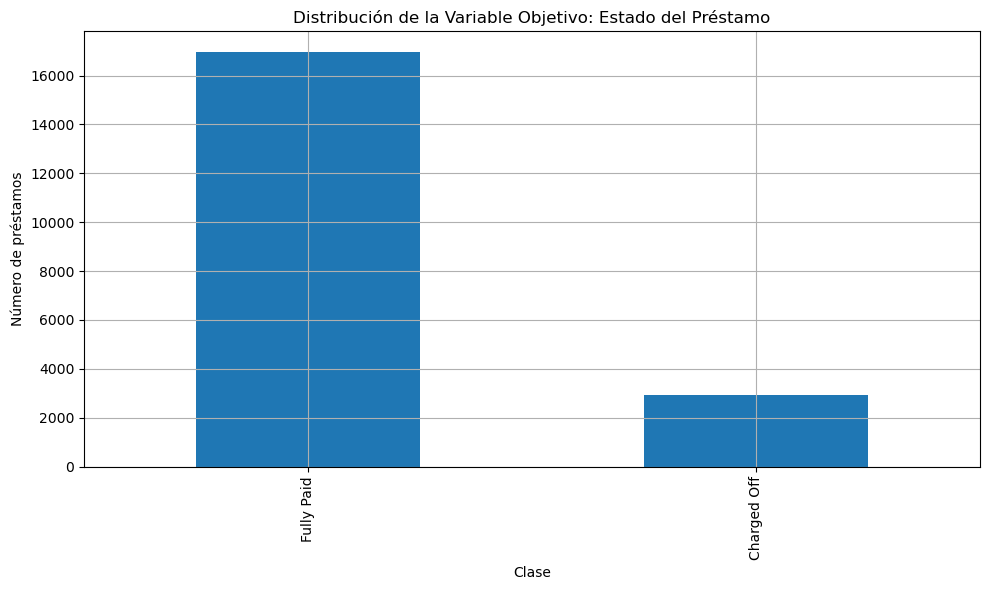

In [654]:
target_counts = y.value_counts()
target_prop = y.value_counts(normalize=True) * 100

print("Distribución absoluta:")
display(target_counts)

print("\nDistribución porcentual (%):")
display(target_prop)

# Visualización
plt.figure()
target_counts.plot(kind="bar")

plt.title("Distribución de la Variable Objetivo: Estado del Préstamo")
plt.ylabel("Número de préstamos")
plt.xlabel("Clase")

save_fig("01_distribucion_target.png")
plt.show()


In [655]:
# Traducimos las clases del target a español

df[TARGET] = df[TARGET].replace({
    "Fully Paid": "Pagado",
    "Charged Off": "Incumplido"
})

# Actualizar y
y = df[TARGET]

print("Clases actualizadas:", y.unique())


Clases actualizadas: ['Pagado' 'Incumplido' nan]


# **Análisis descriptivo inicial**

## **Dimensiones del Dataset**

In [656]:
# Visión global del dataset

print("Dimensión del dataset:", df.shape)
print("\nNúmero total de observaciones:", df.shape[0])
print("Número total de variables:", df.shape[1])

print("\nTipos de datos:")
display(df.dtypes)


Dimensión del dataset: (19908, 20)

Número total de observaciones: 19908
Número total de variables: 20

Tipos de datos:


index                       int64
monto_prestamo              int64
plazo_meses                 int64
tasa_interes              float64
cuota_mensual             float64
grado_crediticio           object
ocupacion                  object
antiguedad_laboral         object
tenencia_vivienda          object
ingreso_anual             float64
verificacion_ingresos      object
estado_prestamo            object
plan_pago                  object
proposito_prestamo         object
estado_residencia          object
ratio_deuda_ingreso       float64
moras_ultimos_2y          float64
utilizacion_revolvente    float64
tipo_solicitud             object
bancarrotas_publicas      float64
dtype: object

## **Variables numéricas**

### **Estadísticos descriptivos**

In [657]:
# Estadísticas descriptivas: Variables numéricas
print("Resumen estadístico de variables numéricas:")
display(df[num_cols].describe().T)


Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
index,"19,908.0000","9,954.5000","5,747.0889",1.0000,"4,977.7500","9,954.5000","14,931.2500","19,908.0000"
monto_prestamo,"19,908.0000","11,353.8464","7,463.7005",500.0000,"5,750.0000","10,000.0000","15,000.0000","35,000.0000"
plazo_meses,"19,908.0000",42.0952,10.4470,36.0000,36.0000,36.0000,60.0000,60.0000
tasa_interes,"19,908.0000",12.0897,3.6983,5.4200,9.4500,11.8600,14.6100,24.4000
cuota_mensual,"19,908.0000",330.6143,210.5574,15.6900,171.2875,285.7800,440.8150,"1,302.6900"
ingreso_anual,"19,905.0000","71,074.7134","69,810.7207","4,000.0000","42,000.0000","60,000.0000","85,000.0000","6,000,000.0000"
ratio_deuda_ingreso,"19,897.0000",13.0099,6.6640,0.0000,7.8400,13.0800,18.2000,29.9900
moras_ultimos_2y,"19,899.0000",0.1446,0.4935,0.0000,0.0000,0.0000,0.0000,11.0000
utilizacion_revolvente,"19,880.0000",49.7354,49.8168,0.0000,26.5000,50.3000,72.8000,"5,829.0000"
bancarrotas_publicas,"19,587.0000",0.0380,0.1914,0.0000,0.0000,0.0000,0.0000,2.0000


### **Cuantiles**

In [658]:
# Cuantiles extremos para outliers

quantiles = df[num_cols].quantile([0.01, 0.05, 0.50, 0.95, 0.99]).T
quantiles.columns = ["1%", "5%", "50%", "95%", "99%"]

print("Cuantiles relevantes (outliers potenciales):")
display(quantiles)


Cuantiles relevantes (outliers potenciales):


,1%,5%,50%,95%,99%
index,200.0700,996.3500,"9,954.5000","18,912.6500","19,708.9300"
monto_prestamo,"1,200.0000","2,400.0000","10,000.0000","25,000.0000","35,000.0000"
plazo_meses,36.0000,36.0000,36.0000,60.0000,60.0000
tasa_interes,5.4200,6.5400,11.8600,18.5400,20.9900
cuota_mensual,39.1449,75.4800,285.7800,773.4000,933.1337
ingreso_anual,"14,400.0000","24,000.0000","60,000.0000","150,000.0000","248,003.8400"
ratio_deuda_ingreso,0.3500,1.9800,13.0800,23.6900,26.2600
moras_ultimos_2y,0.0000,0.0000,0.0000,1.0000,2.0000
utilizacion_revolvente,0.0000,2.9000,50.3000,93.7050,98.5000
bancarrotas_publicas,0.0000,0.0000,0.0000,0.0000,1.0000


## **Variables categóricas**

### **Cardinalidad y categorías principales**

In [659]:
main_cat_cols = [
    "grado_crediticio",
    "tenencia_vivienda",
    "verificacion_ingresos",
    "proposito_prestamo",
    "estado_residencia",
    "tipo_solicitud"
]

print("Resumen de variables categóricas principales:\n")

for col in main_cat_cols:
    if col in df.columns:
        print(f"Variable: {col}")
        print("Número de categorías únicas:", df[col].nunique())
        display(df[col].value_counts().head(10))
        print("-" * 50)


Resumen de variables categóricas principales:

Variable: grado_crediticio
Número de categorías únicas: 7


grado_crediticio
B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: count, dtype: int64

--------------------------------------------------
Variable: tenencia_vivienda
Número de categorías únicas: 5


tenencia_vivienda
RENT        10965
MORTGAGE     7349
OWN          1546
OTHER          44
NONE            1
Name: count, dtype: int64

--------------------------------------------------
Variable: verificacion_ingresos
Número de categorías únicas: 3


verificacion_ingresos
Not Verified       8256
Verified           6464
Source Verified    5185
Name: count, dtype: int64

--------------------------------------------------
Variable: proposito_prestamo
Número de categorías únicas: 14


proposito_prestamo
debt_consolidation    9387
credit_card           2696
other                 2059
home_improvement      1330
major_purchase        1048
small_business         905
car                    687
wedding                539
medical                350
moving                 317
Name: count, dtype: int64

--------------------------------------------------
Variable: estado_residencia
Número de categorías únicas: 8


estado_residencia
CA       7101
NY       3813
FL       2870
TX       2733
NJ       1855
IL       1525
951xx       1
106xx       1
Name: count, dtype: int64

--------------------------------------------------
Variable: tipo_solicitud
Número de categorías únicas: 2


tipo_solicitud
Individual    19906
1                 2
Name: count, dtype: int64

--------------------------------------------------


In [660]:
print("Variable: ocupacion")
print("Número de categorías únicas:", df["ocupacion"].nunique())

print("\nTop 10 ocupaciones más frecuentes:")
display(df["ocupacion"].value_counts().head(10))

print("\nConclusión: Esta variable presenta alta cardinalidad, por lo que "
      "no es conveniente aplicar encoding completo en esta entrega inicial.")


Variable: ocupacion
Número de categorías únicas: 15047

Top 10 ocupaciones más frecuentes:


ocupacion
Bank of America        53
Kaiser Permanente      50
State of California    42
US Army                40
AT&T                   36
JP Morgan Chase        27
IBM                    25
Verizon                24
UPS                    23
Target                 21
Name: count, dtype: int64


Conclusión: Esta variable presenta alta cardinalidad, por lo que no es conveniente aplicar encoding completo en esta entrega inicial.


### **Distribución del Target**

In [661]:
display(y.value_counts())
display(y.value_counts(normalize=True) * 100)


estado_prestamo
Pagado        16962
Incumplido     2943
Name: count, dtype: int64

estado_prestamo
Pagado       85.2148
Incumplido   14.7852
Name: proportion, dtype: float64

## **Diagnóstico inicial (preliminar)**

In [662]:
# Diagnóstico de posibles outliers en variables numéricas clave

suspicious_cols = ["ingreso_anual", "utilizacion_revolvente", "ratio_deuda_ingreso"]

for col in suspicious_cols:
    if col in df.columns:
        print(f"\nVariable: {col}")
        print("Mínimo:", df[col].min())
        print("Máximo:", df[col].max())
        print("Top 5 valores más altos:")
        display(df[col].sort_values(ascending=False).head())



Variable: ingreso_anual
Mínimo: 4000.0
Máximo: 6000000.0
Top 5 valores más altos:


15083   6,000,000.0000
19630   2,039,784.0000
11728   1,900,000.0000
3686    1,782,000.0000
17095   1,440,000.0000
Name: ingreso_anual, dtype: float64


Variable: utilizacion_revolvente
Mínimo: 0.0
Máximo: 5829.0
Top 5 valores más altos:


1685    5,829.0000
1913      404.0000
2596       99.9000
14462      99.9000
3719       99.9000
Name: utilizacion_revolvente, dtype: float64


Variable: ratio_deuda_ingreso
Mínimo: 0.0
Máximo: 29.99
Top 5 valores más altos:


6383   29.9900
8108   29.9300
5235   29.9200
2467   29.9200
7956   29.8900
Name: ratio_deuda_ingreso, dtype: float64

# **Análisis de Calidad**

## **Missing Values**

In [663]:
missing_abs = df.isnull().sum()
missing_pct = (missing_abs / len(df)) * 100

missing_table = pd.DataFrame({
    "Missing_Abs": missing_abs,
    "Missing_%": missing_pct
})

missing_table = missing_table[missing_table["Missing_Abs"] > 0].sort_values(by="Missing_%", ascending=False)

print("Valores faltantes en el dataset:")
display(missing_table)


Valores faltantes en el dataset:


,Missing_Abs,Missing_%
ocupacion,1185,5.9524
antiguedad_laboral,502,2.5216
bancarrotas_publicas,321,1.6124
utilizacion_revolvente,28,0.1406
ratio_deuda_ingreso,11,0.0553
estado_residencia,9,0.0452
moras_ultimos_2y,9,0.0452
tenencia_vivienda,3,0.0151
ingreso_anual,3,0.0151
verificacion_ingresos,3,0.0151


## **Duplicados**

In [664]:
duplicates = df.duplicated().sum()

print("Número de filas duplicadas:", duplicates)


Número de filas duplicadas: 0


## **Variables constantes**

In [665]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

print("Variables constantes detectadas:")
print(constant_cols)


Variables constantes detectadas:
['plan_pago']


## **Cardinalidad alta en variables categóricas**

In [666]:
high_cardinality = {}

for col in cat_cols:
    n_unique = df[col].nunique()
    if n_unique > 30:
        high_cardinality[col] = n_unique

print("Variables categóricas con alta cardinalidad:")
display(high_cardinality)


Variables categóricas con alta cardinalidad:


{'ocupacion': 15047}

## **Valores fuera de rango esperable**

In [667]:
# Utilización revolvente debería ser 0–100
if "utilizacion_revolvente" in df.columns:
    invalid_revol = df[df["utilizacion_revolvente"] > 100]
    print("Casos con utilizacion_revolvente > 100:", invalid_revol.shape[0])
    display(invalid_revol[["utilizacion_revolvente"]].head())

# Ingreso anual extremo
if "ingreso_anual" in df.columns:
    print("\nTop ingresos más altos:")
    display(df["ingreso_anual"].sort_values(ascending=False).head())


Casos con utilizacion_revolvente > 100: 2


,utilizacion_revolvente
1685,"5,829.0000"
1913,404.0000



Top ingresos más altos:


15083   6,000,000.0000
19630   2,039,784.0000
11728   1,900,000.0000
3686    1,782,000.0000
17095   1,440,000.0000
Name: ingreso_anual, dtype: float64

## **Categorías inconsistentes**

In [668]:
check_cols = ["tipo_solicitud", "estado_residencia"]

for col in check_cols:
    if col in df.columns:
        print(f"\nVariable: {col}")
        display(df[col].value_counts().tail(10))



Variable: tipo_solicitud


tipo_solicitud
Individual    19906
1                 2
Name: count, dtype: int64


Variable: estado_residencia


estado_residencia
CA       7101
NY       3813
FL       2870
TX       2733
NJ       1855
IL       1525
951xx       1
106xx       1
Name: count, dtype: int64

# **Prepocesamiento**

In [669]:
# Copia de trabajo del dataset original

df_clean = df.copy()

## **Eliminación de variables constantes**

In [670]:
if "plan_pago" in df_clean.columns:
    df_clean = df_clean.drop(columns=["plan_pago"])
    print("Variable constante 'plan_pago' eliminada.")

print("Dimensión actual:", df_clean.shape)


Variable constante 'plan_pago' eliminada.
Dimensión actual: (19908, 19)


## **Tratamiento de variables inválidas**

In [671]:
if "utilizacion_revolvente" in df_clean.columns:
    invalid_count = (df_clean["utilizacion_revolvente"] > 100).sum()
    print("Casos con utilizacion_revolvente > 100:", invalid_count)

    # Reemplazar por NaN para imputación posterior
    df_clean.loc[df_clean["utilizacion_revolvente"] > 100, "utilizacion_revolvente"] = np.nan
    print("Valores inválidos reemplazados por NaN.")


Casos con utilizacion_revolvente > 100: 2
Valores inválidos reemplazados por NaN.


## **Liempieza de categorías inconsistentes**

In [672]:
# tipo_solicitud: corregir valores raros
if "tipo_solicitud" in df_clean.columns:
    df_clean["tipo_solicitud"] = df_clean["tipo_solicitud"].replace({"1": np.nan})

print("Categorías únicas en tipo_solicitud:")
display(df_clean["tipo_solicitud"].value_counts())


Categorías únicas en tipo_solicitud:


tipo_solicitud
Individual    19906
1                 2
Name: count, dtype: int64

In [673]:
# estado_residencia: corregir valores raros tipo ZIP
if "estado_residencia" in df_clean.columns:
    rare_states = ["951xx", "106xx"]

    df_clean["estado_residencia"] = df_clean["estado_residencia"].replace(
        {st: np.nan for st in rare_states}
    )

print("Categorías únicas en estado_residencia (tail):")
display(df_clean["estado_residencia"].value_counts().tail(5))


Categorías únicas en estado_residencia (tail):


estado_residencia
NY    3813
FL    2870
TX    2733
NJ    1855
IL    1525
Name: count, dtype: int64

## **Imputación numérica (mediana)**

In [674]:
num_cols_clean = df_clean.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols_clean:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_value)

print("Imputación numérica completada.")


Imputación numérica completada.


## **Imputación categórica**

In [675]:
cat_cols_clean = df_clean.select_dtypes(include=["object"]).columns

for col in cat_cols_clean:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna("Otros")

print("Imputación categórica completada.")


Imputación categórica completada.


## **Eliminación de observaciones en la target**

In [676]:
TARGET = "estado_prestamo"

print("Valores faltantes en el target antes:", df_clean[TARGET].isnull().sum())

# Eliminar filas donde el target es NaN
df_clean = df_clean.dropna(subset=[TARGET])
df_clean = df_clean[df_clean[TARGET] != "Otros"]
df_clean = df_clean[
    (df_clean["estado_residencia"] != "Otros")
]


print("Valores faltantes en el target después:", df_clean[TARGET].isnull().sum())


Valores faltantes en el target antes: 0
Valores faltantes en el target después: 0


## **Validación final**

In [677]:
print("Dimensión final:", df_clean.shape)

print("\nMissing values restantes:")
display(df_clean.isnull().sum().sort_values(ascending=False).head(10))

print("\nVariables constantes restantes:")
display([col for col in df_clean.columns if df_clean[col].nunique() == 1])


Dimensión final: (19897, 19)

Missing values restantes:


index                     0
verificacion_ingresos     0
tipo_solicitud            0
utilizacion_revolvente    0
moras_ultimos_2y          0
ratio_deuda_ingreso       0
estado_residencia         0
proposito_prestamo        0
estado_prestamo           0
ingreso_anual             0
dtype: int64


Variables constantes restantes:


['tipo_solicitud']

In [678]:
display(df_clean.head(10))
display(df_clean.shape)

,index,monto_prestamo,plazo_meses,tasa_interes,cuota_mensual,grado_crediticio,ocupacion,antiguedad_laboral,tenencia_vivienda,ingreso_anual,verificacion_ingresos,estado_prestamo,proposito_prestamo,estado_residencia,ratio_deuda_ingreso,moras_ultimos_2y,utilizacion_revolvente,tipo_solicitud,bancarrotas_publicas
0,1,2400,36,15.9600,84.3300,C,Otros,10+ years,RENT,"12,252.0000",Not Verified,Pagado,small_business,IL,8.7200,0.0000,98.5000,Individual,0.0000
1,2,10000,36,13.4900,339.3100,C,AIR RESOURCES BOARD,10+ years,RENT,"49,200.0000",Source Verified,Pagado,other,CA,20.0000,0.0000,21.0000,Individual,0.0000
2,3,3000,36,18.6400,109.4300,E,MKC Accounting,9 years,RENT,"48,000.0000",Source Verified,Pagado,car,CA,5.3500,0.0000,87.5000,Individual,0.0000
3,4,5600,60,21.2800,152.3900,F,Otros,4 years,OWN,"40,000.0000",Source Verified,Incumplido,small_business,CA,5.5500,0.0000,32.6000,Individual,0.0000
4,5,5375,60,12.6900,121.4500,B,Starbucks,< 1 year,RENT,"15,000.0000",Verified,Incumplido,other,TX,18.0800,0.0000,36.5000,Individual,0.0000
5,6,12000,36,12.6900,402.5400,B,UCLA,10+ years,OWN,"75,000.0000",Source Verified,Pagado,debt_consolidation,CA,10.7800,0.0000,67.1000,Individual,0.0000
6,7,3000,36,9.9100,96.6800,B,Target,3 years,RENT,"15,000.0000",Source Verified,Pagado,credit_card,IL,12.5600,0.0000,43.1000,Individual,0.0000
7,8,10000,36,10.6500,325.7400,B,SFMTA,3 years,RENT,"100,000.0000",Source Verified,Incumplido,other,CA,7.0600,0.0000,55.5000,Individual,0.0000
8,9,10000,36,15.2700,347.9800,C,Chin's Restaurant,4 years,RENT,"42,000.0000",Not Verified,Pagado,home_improvement,CA,18.6000,0.0000,70.2000,Individual,0.0000
9,10,9200,36,6.0300,280.0100,A,Network Interpreting Service,6 years,RENT,"77,385.0000",Not Verified,Pagado,debt_consolidation,CA,9.8600,0.0000,23.1000,Individual,0.0000


(19897, 19)

# **EDA univariado + Visualización**

In [679]:
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

print("Variables numéricas:", len(num_cols))
print("Variables categóricas:", len(cat_cols))


Variables numéricas: 10
Variables categóricas: 9


## **Histogramas**

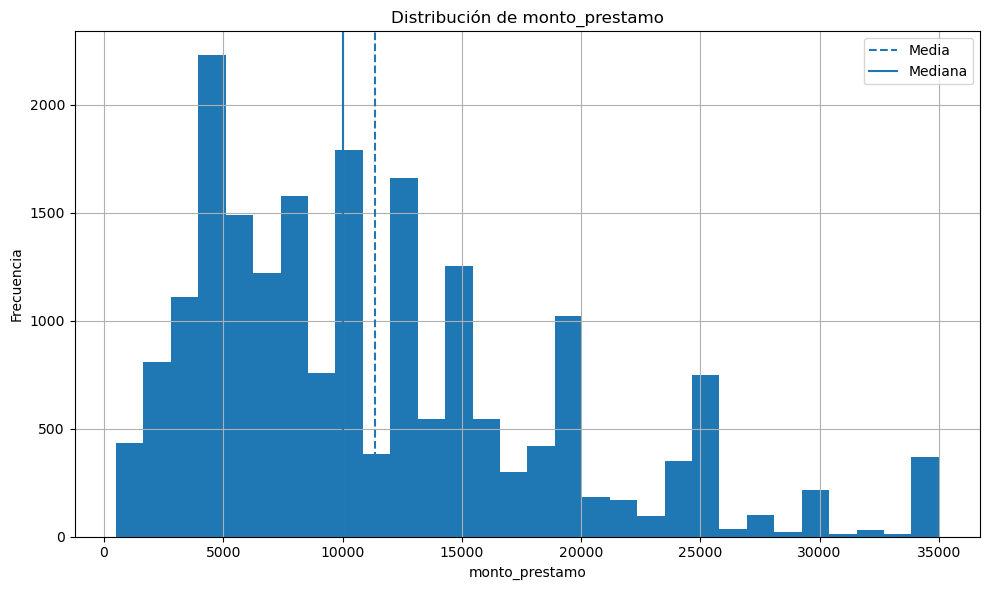

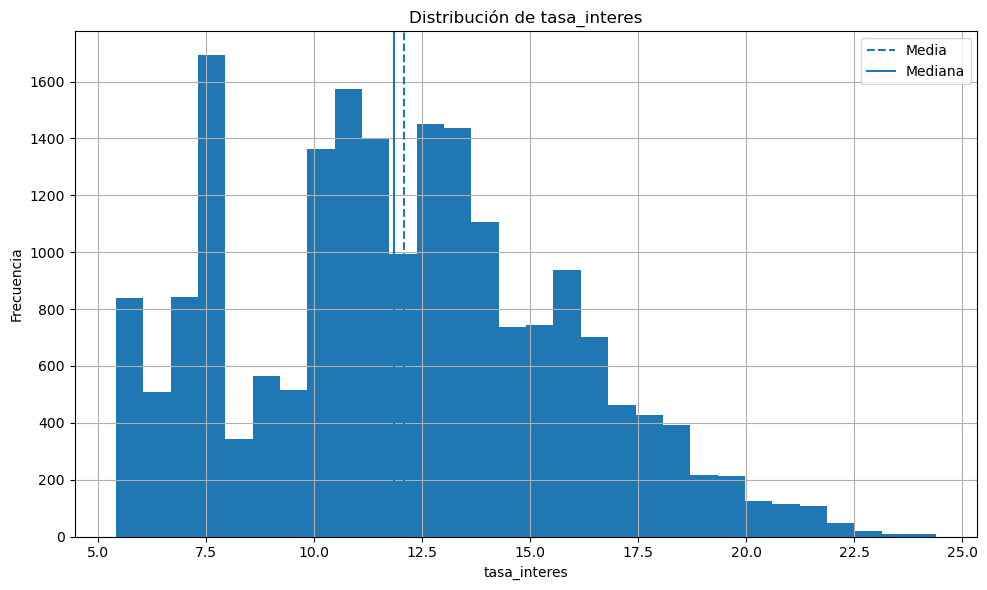

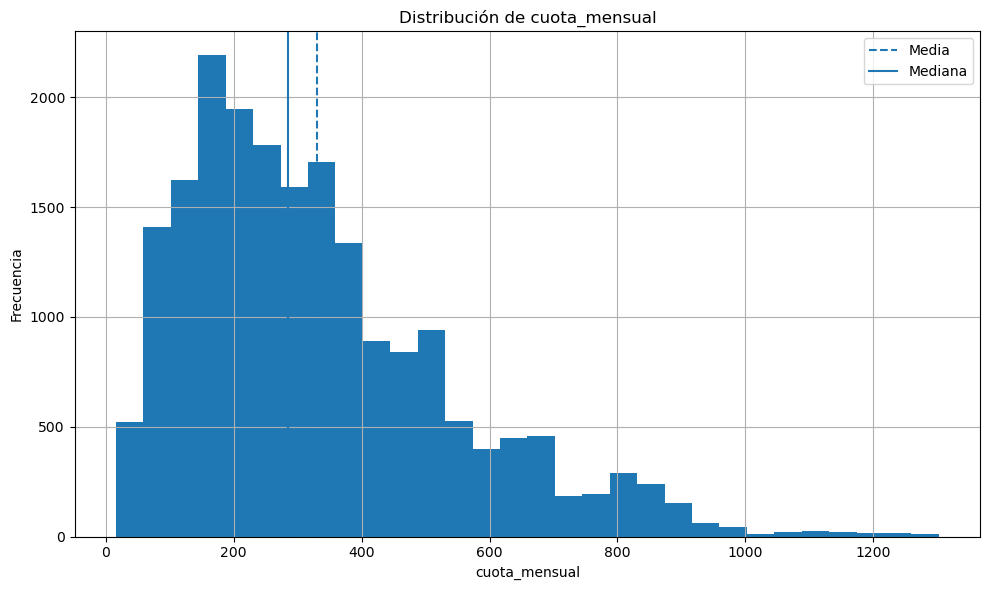

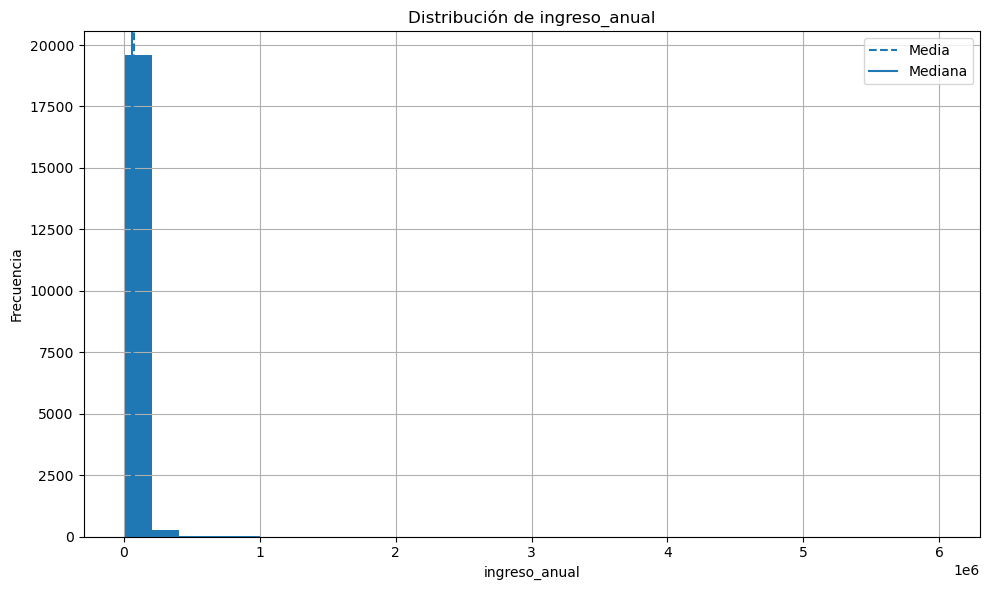

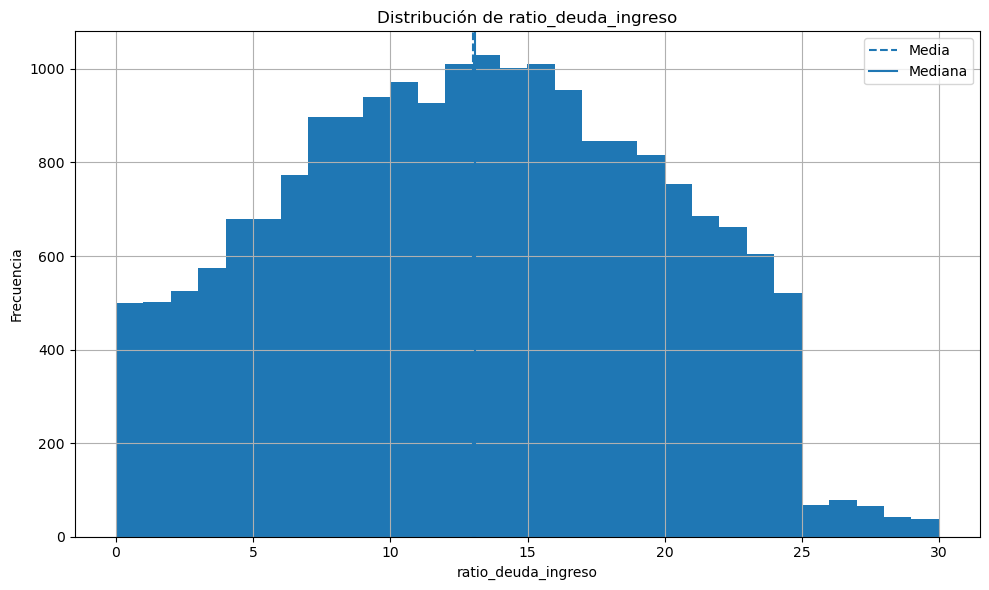

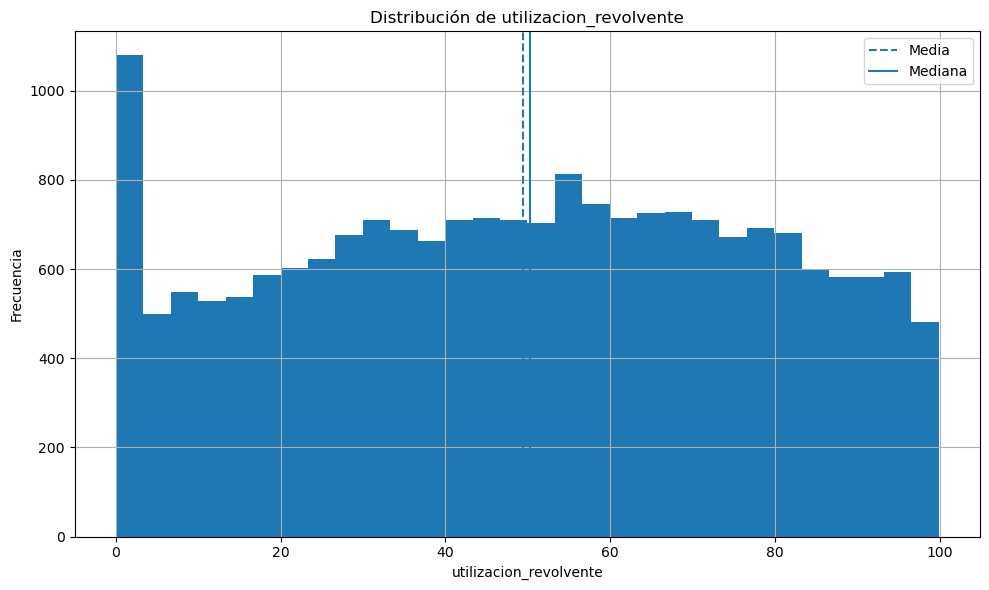

In [680]:
main_num_cols = [
    "monto_prestamo",
    "tasa_interes",
    "cuota_mensual",
    "ingreso_anual",
    "ratio_deuda_ingreso",
    "utilizacion_revolvente"
]

for col in main_num_cols:
    if col in df_clean.columns:

        plt.figure()
        plt.hist(df_clean[col], bins=30)

        # Líneas de referencia banca
        mean_val = df_clean[col].mean()
        median_val = df_clean[col].median()

        plt.axvline(mean_val, linestyle="--", label="Media")
        plt.axvline(median_val, linestyle="-", label="Mediana")

        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.legend()

        save_fig(f"02_hist_{col}.png")
        plt.show()



## **Boxplots**

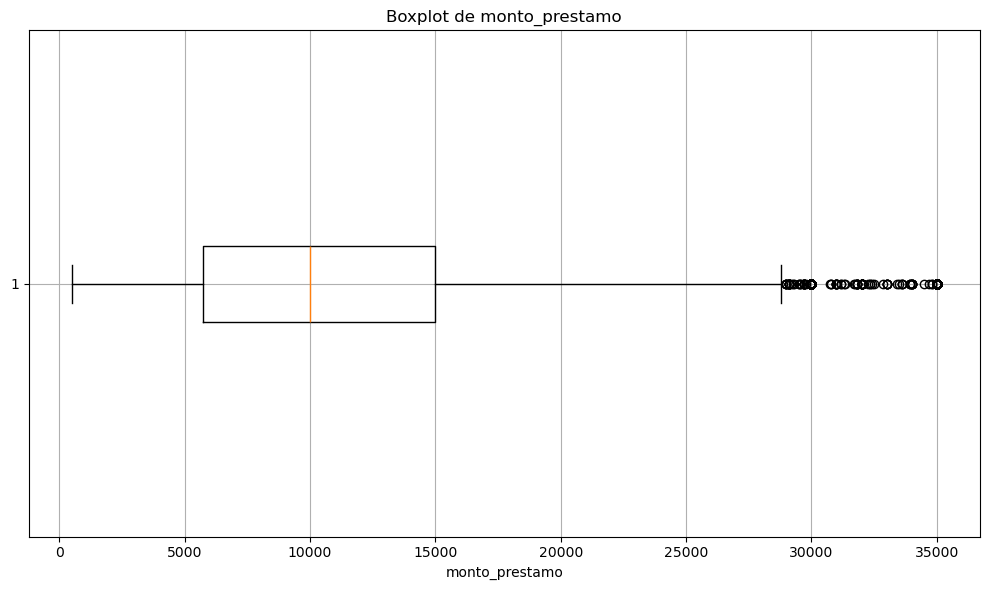

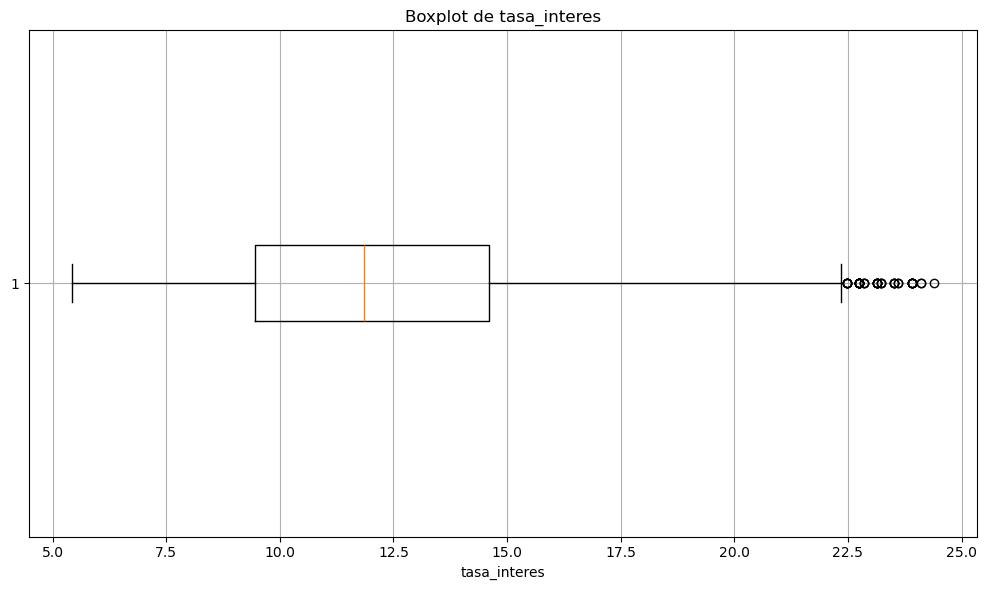

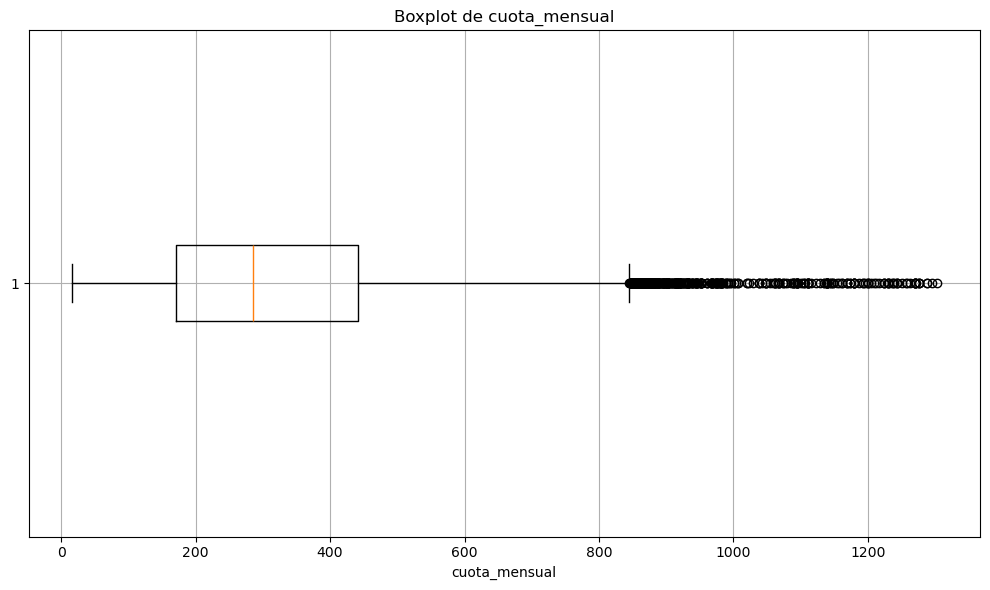

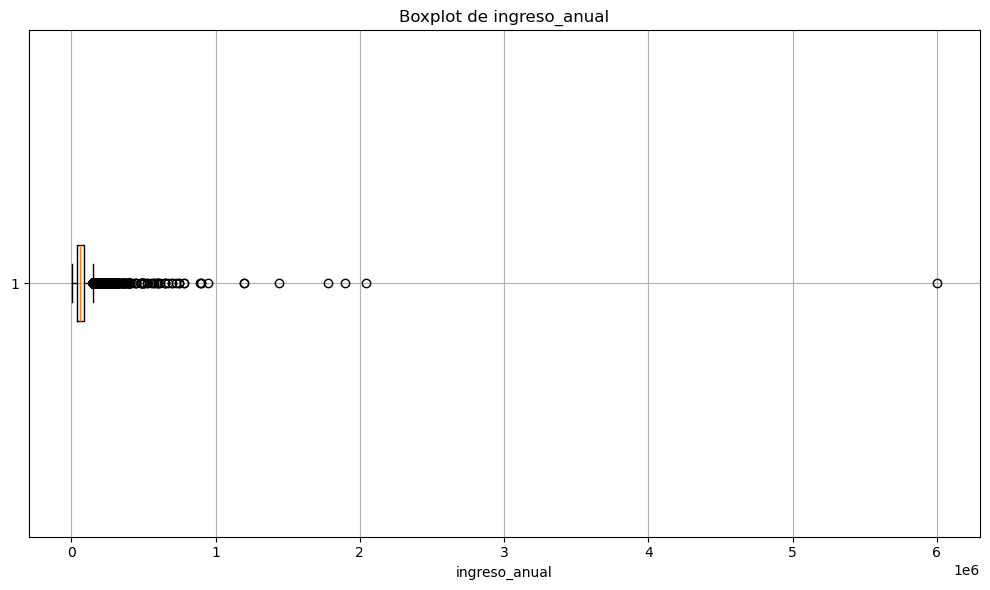

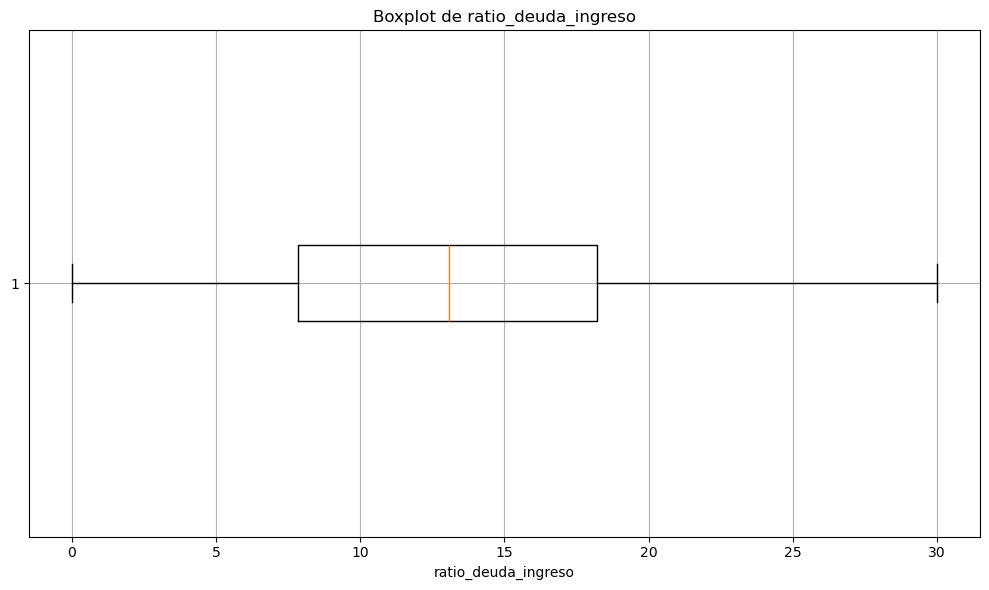

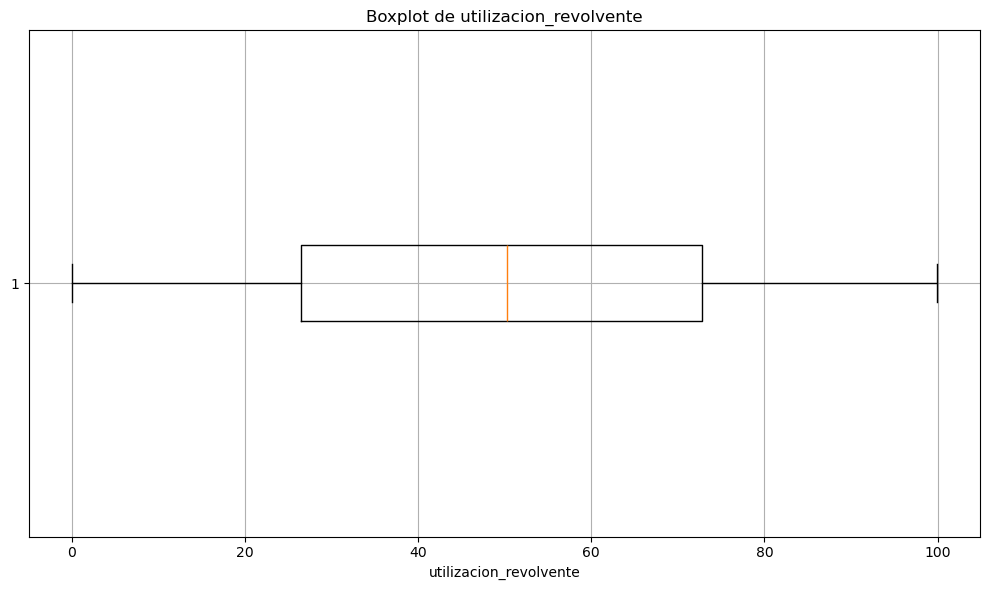

In [681]:
for col in main_num_cols:
    if col in df_clean.columns:
        plt.figure()
        plt.boxplot(df_clean[col], vert=False)
        plt.title(f"Boxplot de {col}")
        plt.xlabel(col)

        save_fig(f"03_boxplot_{col}.png")
        plt.show()


## **Frecuencias**

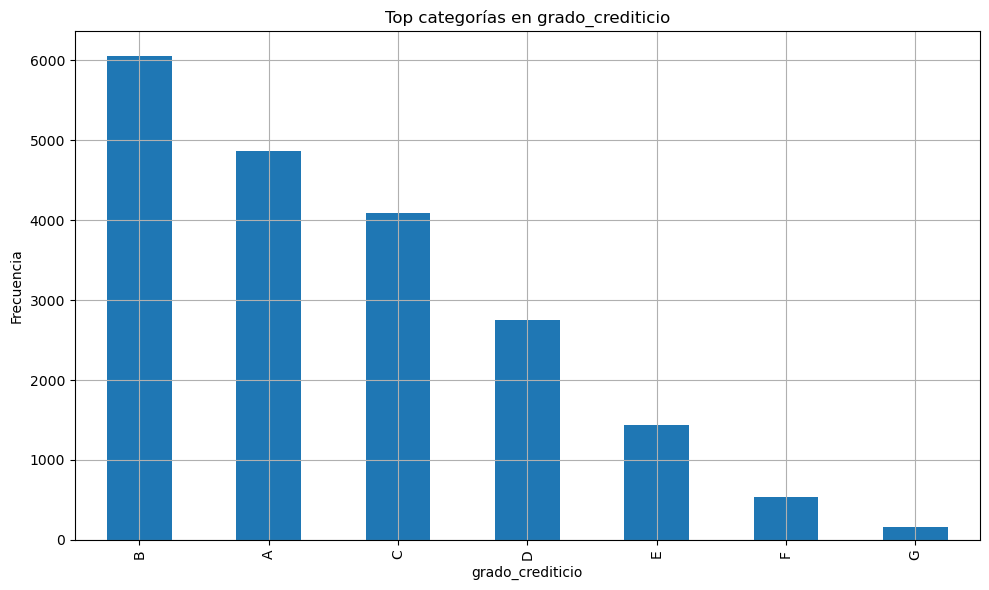

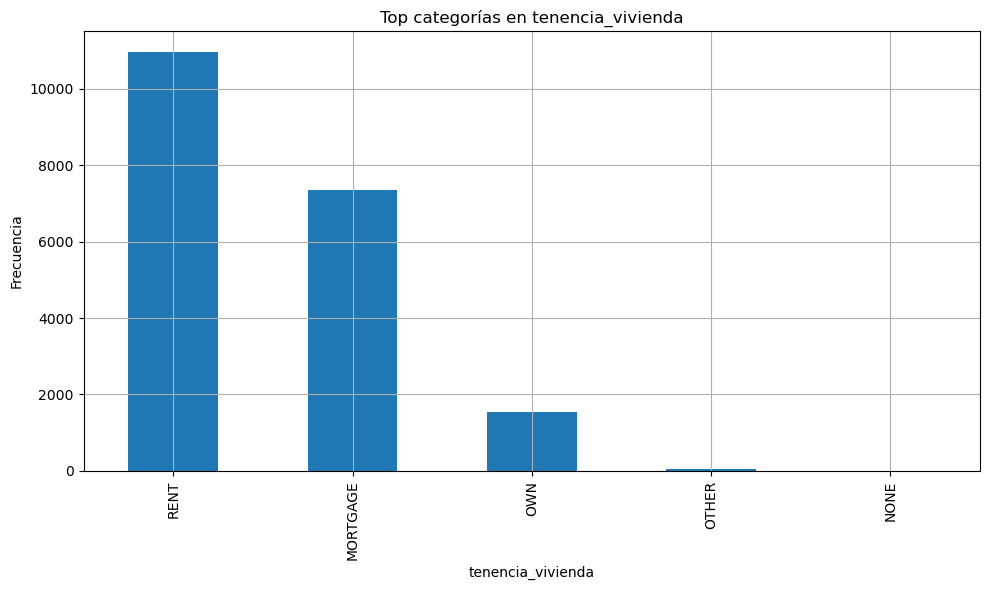

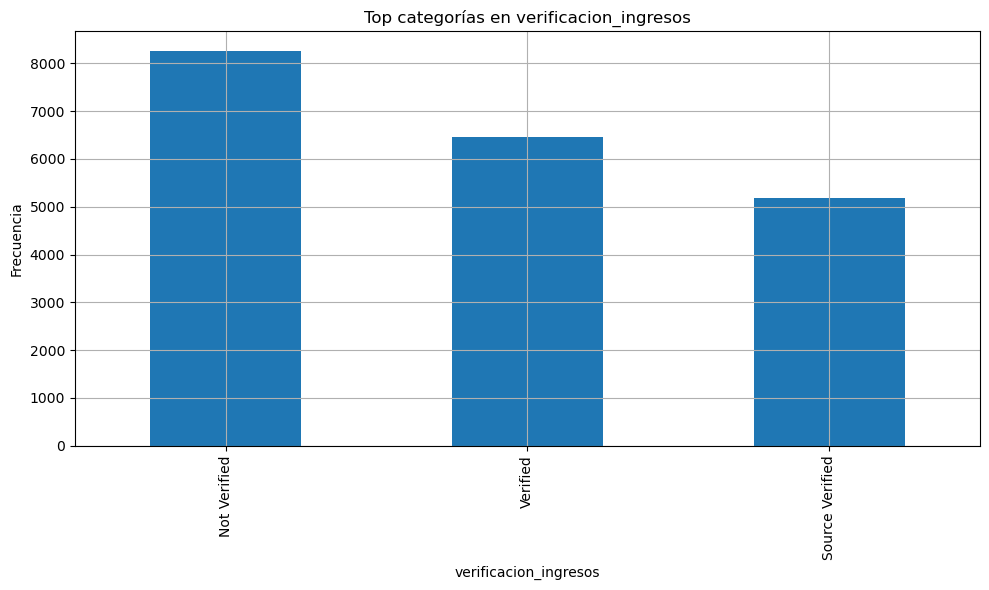

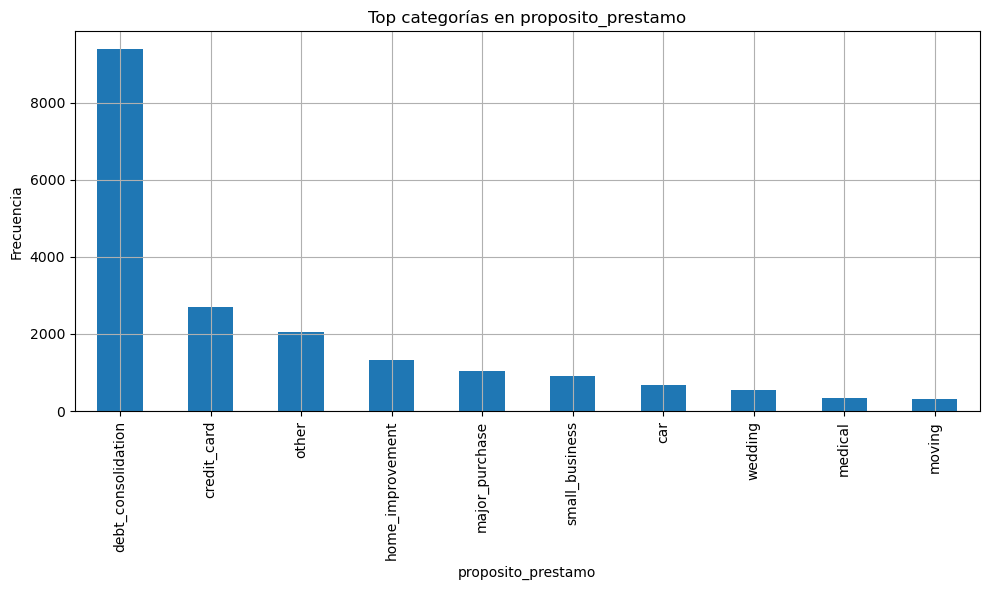

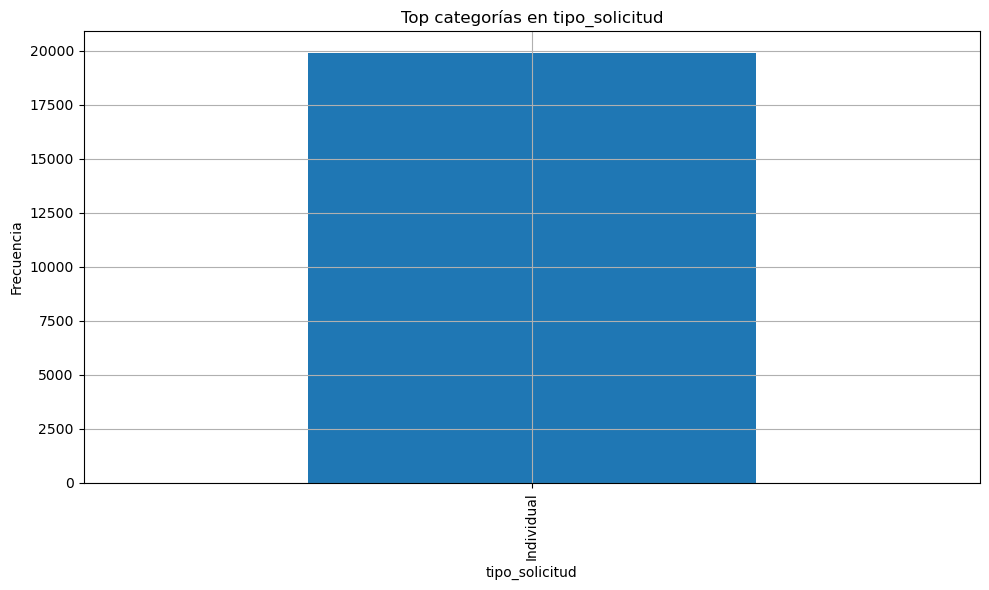

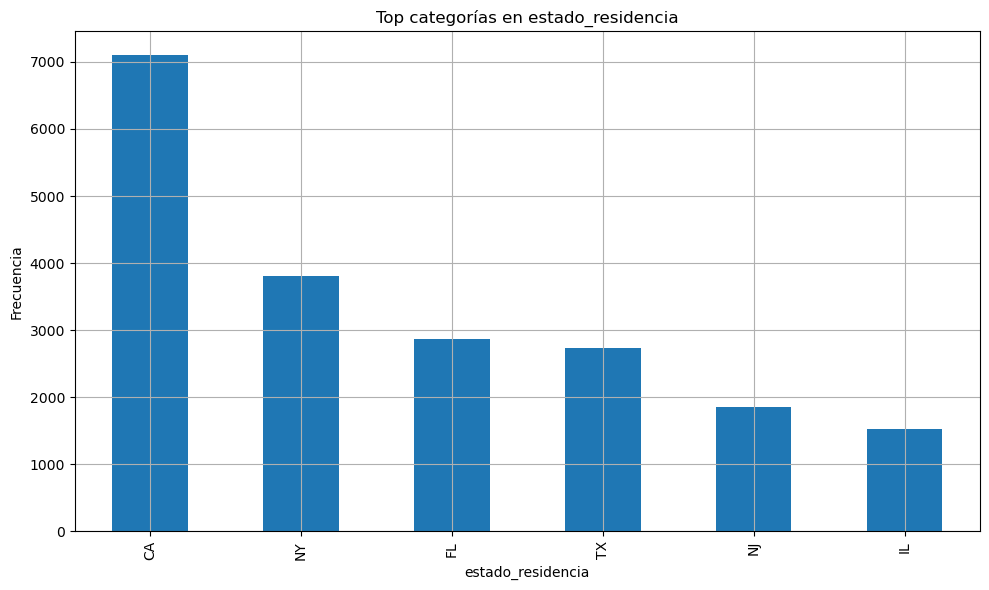

In [682]:
main_cat_cols = [
    "grado_crediticio",
    "tenencia_vivienda",
    "verificacion_ingresos",
    "proposito_prestamo",
    "tipo_solicitud",
    "estado_residencia"
]

for col in main_cat_cols:
    if col in df_clean.columns:
        plt.figure()
        df_clean[col].value_counts().head(10).plot(kind="bar")
        
        plt.title(f"Top categorías en {col}")
        plt.ylabel("Frecuencia")
        plt.xlabel(col)

        save_fig(f"04_bar_{col}.png")
        plt.show()


## **Variable especial**

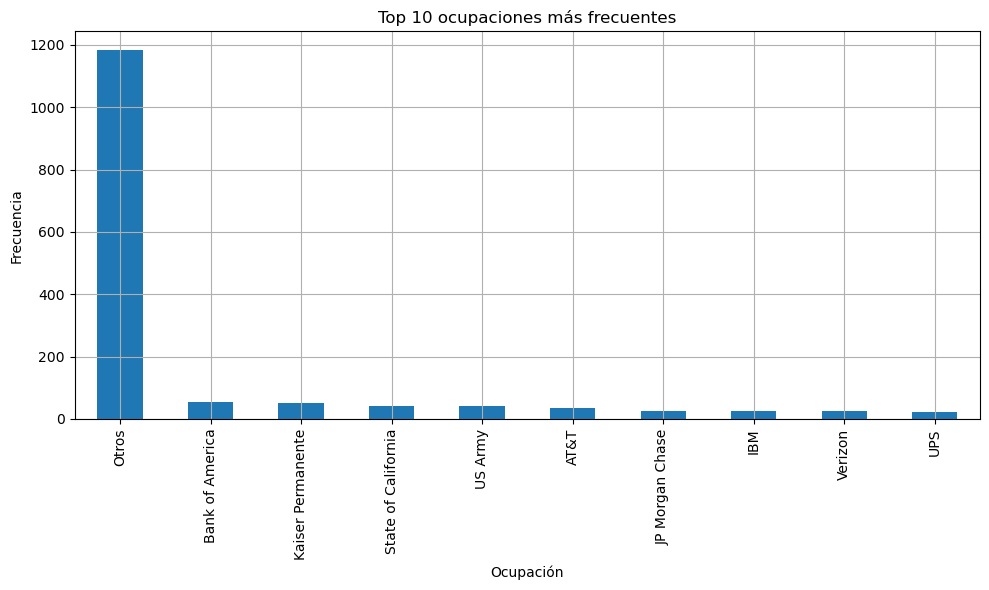

Número total de categorías en ocupación: 15041


In [683]:
plt.figure()
df_clean["ocupacion"].value_counts().head(10).plot(kind="bar")

plt.title("Top 10 ocupaciones más frecuentes")
plt.ylabel("Frecuencia")
plt.xlabel("Ocupación")

save_fig("05_bar_ocupacion_top10.png")
plt.show()

print("Número total de categorías en ocupación:", df_clean["ocupacion"].nunique())


# **EDA bivariado + Visualización**

In [684]:
TARGET = "estado_prestamo"

print("Clases del target:")
display(df_clean[TARGET].value_counts())

# Crear variable binaria auxiliar para tasas
df_clean["target_bin"] = df_clean[TARGET].apply(lambda x: 1 if x == "Incumplido" else 0)

print("\nPromedio target_bin (tasa de incumplimiento):")
print(df_clean["target_bin"].mean())


Clases del target:


estado_prestamo
Pagado        16954
Incumplido     2943
Name: count, dtype: int64


Promedio target_bin (tasa de incumplimiento):
0.14791174548926975


## **Boxplots**

<Figure size 1000x600 with 0 Axes>

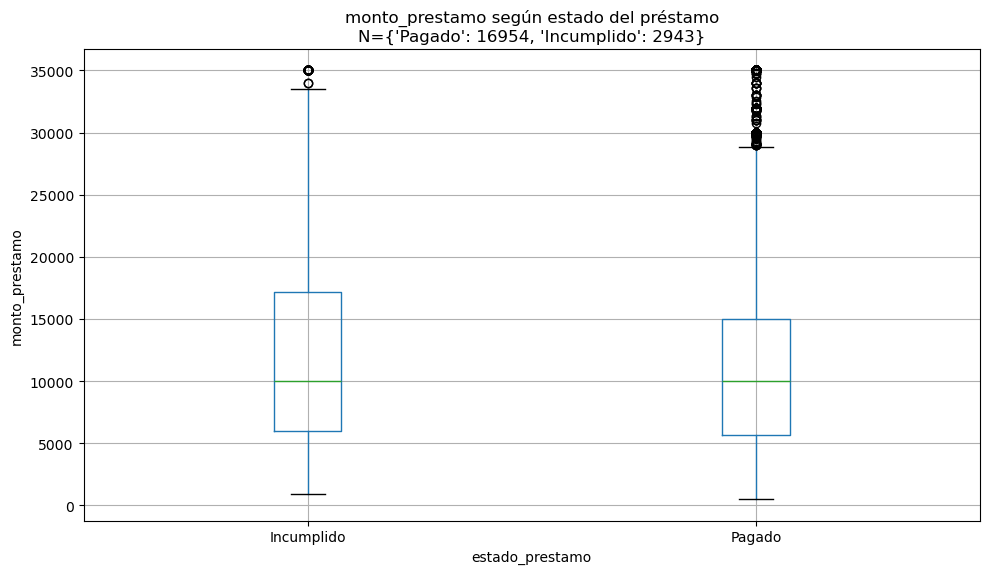

<Figure size 1000x600 with 0 Axes>

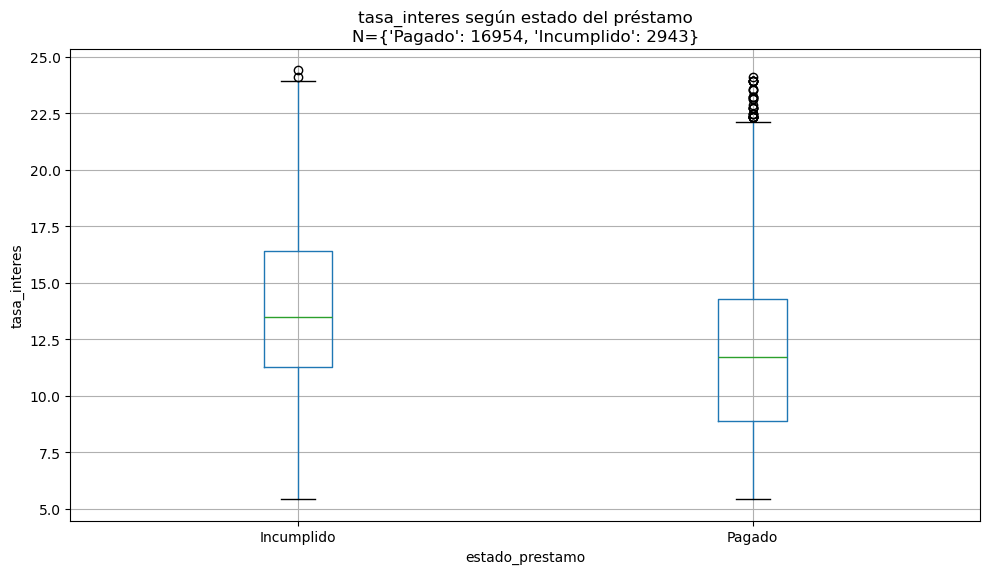

<Figure size 1000x600 with 0 Axes>

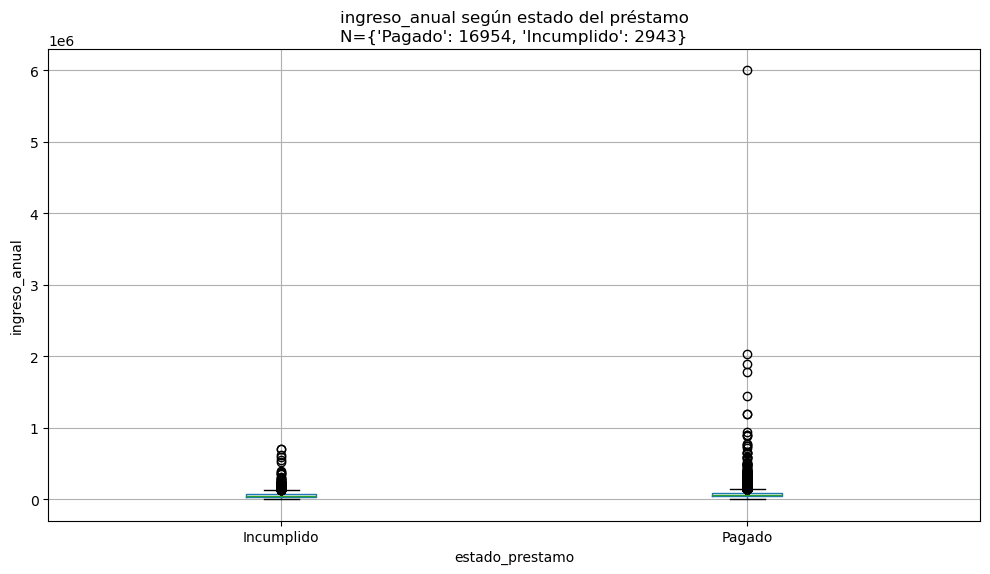

<Figure size 1000x600 with 0 Axes>

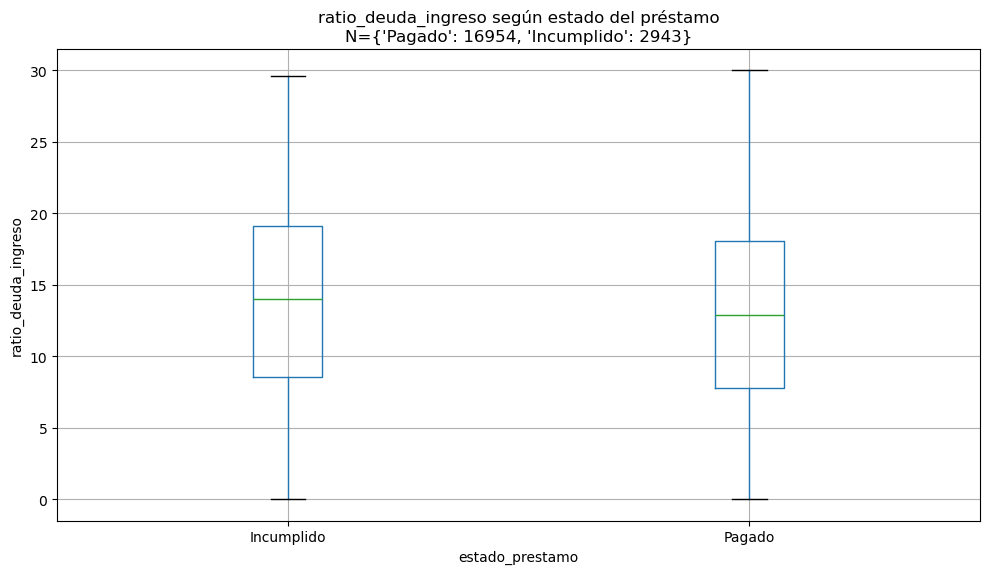

<Figure size 1000x600 with 0 Axes>

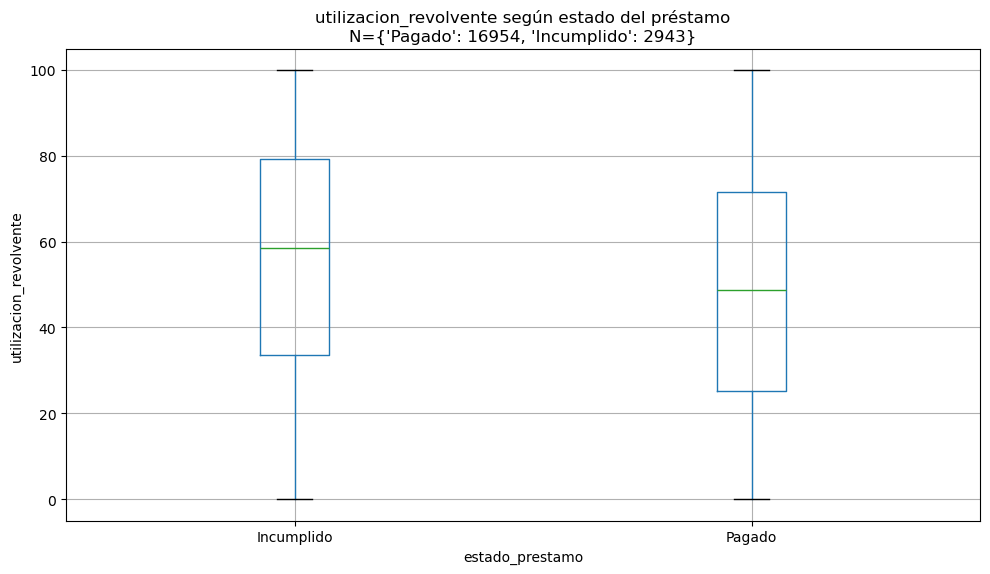

In [685]:
bivar_num_cols = [
    "monto_prestamo",
    "tasa_interes",
    "ingreso_anual",
    "ratio_deuda_ingreso",
    "utilizacion_revolvente"
]

for col in bivar_num_cols:

    if col in df_clean.columns:

        plt.figure()

        df_clean.boxplot(column=col, by=TARGET)

        # Tamaños por clase
        counts = df_clean[TARGET].value_counts()

        plt.title(f"{col} según estado del préstamo\nN={dict(counts)}")
        plt.suptitle("")

        plt.ylabel(col)

        save_fig(f"06_boxplot_bivar_{col}.png")
        plt.show()

## **Tasa de incumplimiento por cuantiles**

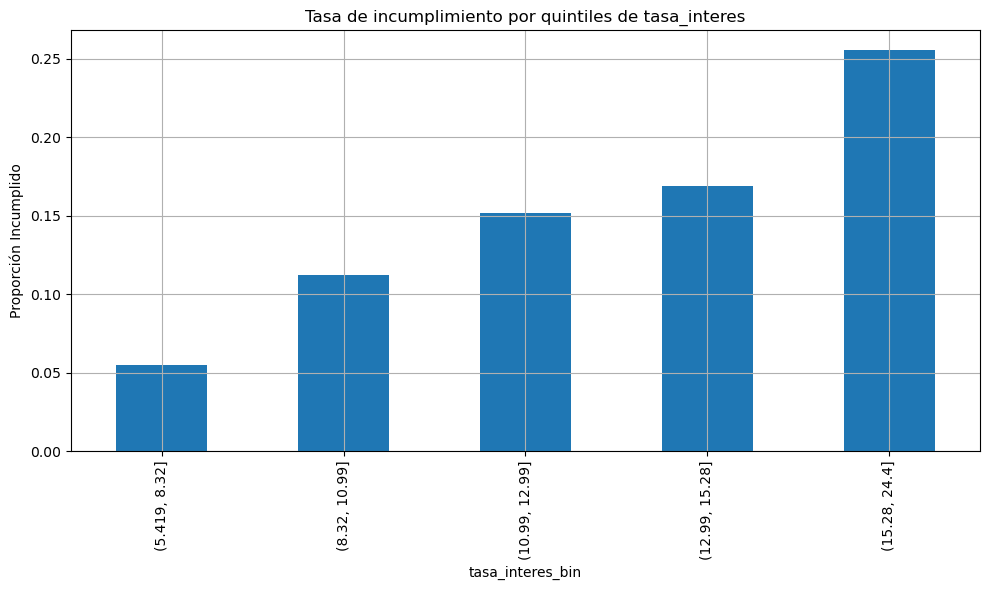

tasa_interes_bin
(5.419, 8.32]    0.0546
(8.32, 10.99]    0.1122
(10.99, 12.99]   0.1518
(12.99, 15.28]   0.1686
(15.28, 24.4]    0.2554
Name: target_bin, dtype: float64

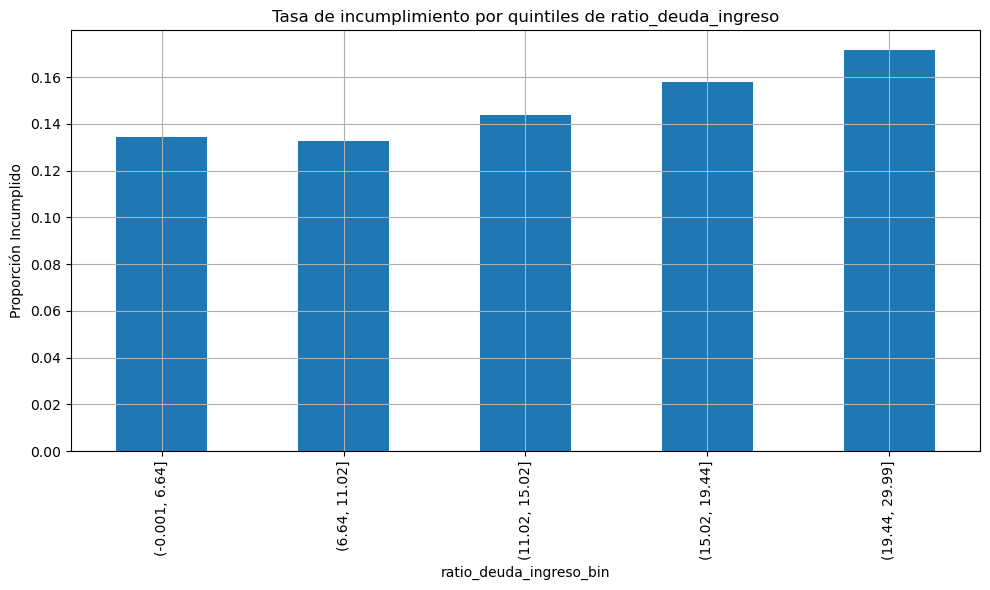

ratio_deuda_ingreso_bin
(-0.001, 6.64]   0.1341
(6.64, 11.02]    0.1325
(11.02, 15.02]   0.1437
(15.02, 19.44]   0.1579
(19.44, 29.99]   0.1714
Name: target_bin, dtype: float64

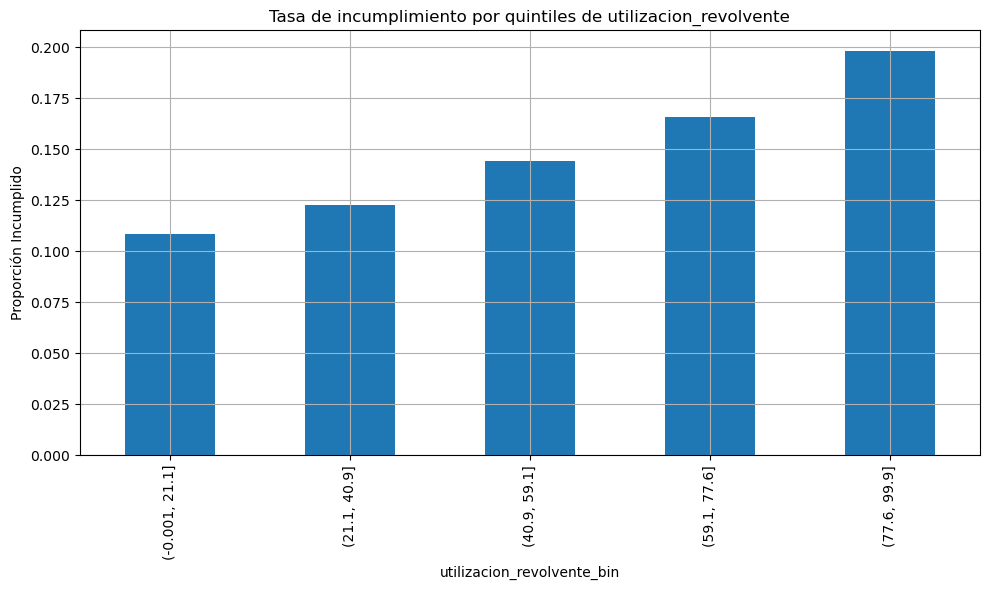

utilizacion_revolvente_bin
(-0.001, 21.1]   0.1083
(21.1, 40.9]     0.1229
(40.9, 59.1]     0.1444
(59.1, 77.6]     0.1658
(77.6, 99.9]     0.1985
Name: target_bin, dtype: float64

In [686]:
bucket_cols = ["tasa_interes", "ratio_deuda_ingreso", "utilizacion_revolvente"]

for col in bucket_cols:
    if col in df_clean.columns:
        df_clean[f"{col}_bin"] = pd.qcut(df_clean[col], q=5, duplicates="drop")

        event_rate = df_clean.groupby(f"{col}_bin")["target_bin"].mean()

        plt.figure()
        event_rate.plot(kind="bar")

        plt.title(f"Tasa de incumplimiento por quintiles de {col}")
        plt.ylabel("Proporción Incumplido")

        save_fig(f"07_eventrate_{col}.png")
        plt.show()

        display(event_rate)


## **Tasa de incumplimiento por categoría**

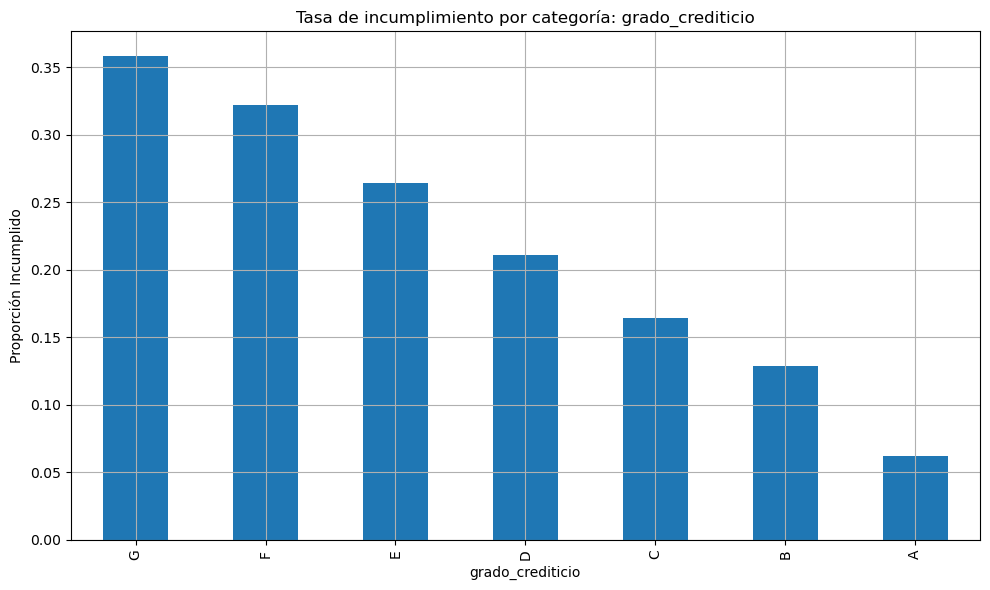

grado_crediticio
G   0.3585
F   0.3222
E   0.2638
D   0.2108
C   0.1645
B   0.1285
A   0.0624
Name: target_bin, dtype: float64

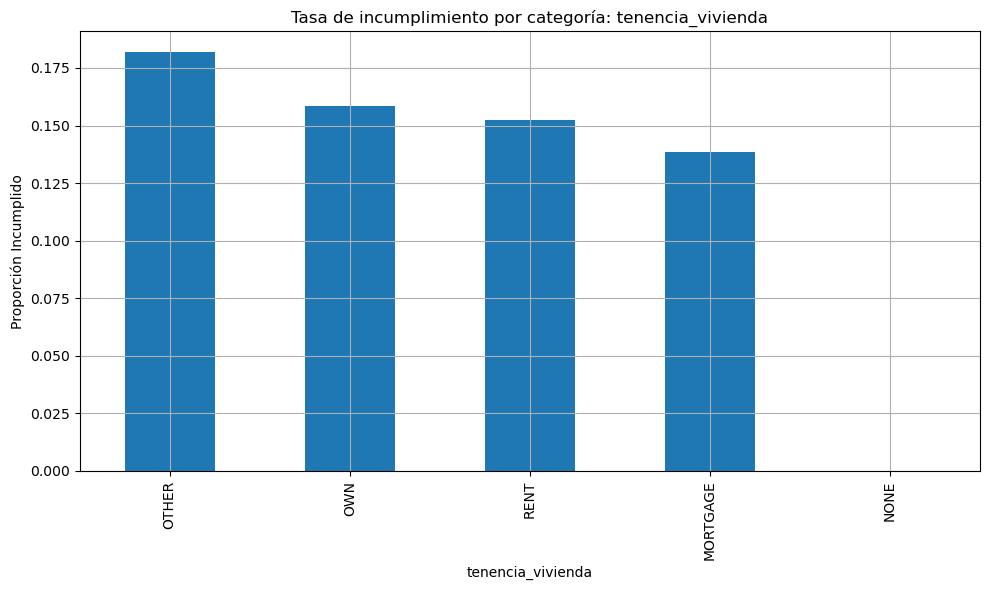

tenencia_vivienda
OTHER      0.1818
OWN        0.1585
RENT       0.1525
MORTGAGE   0.1387
NONE       0.0000
Name: target_bin, dtype: float64

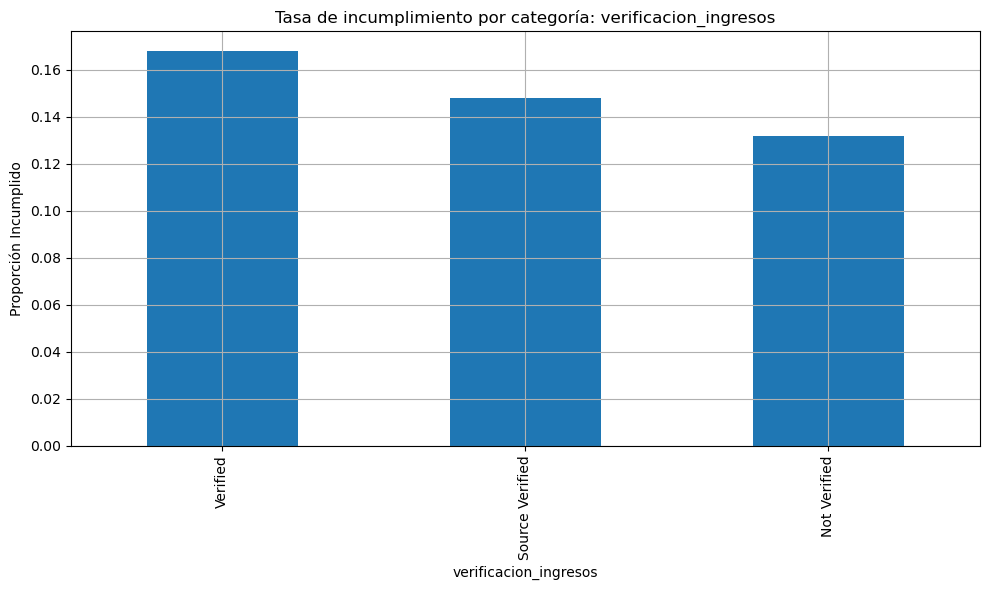

verificacion_ingresos
Verified          0.1680
Source Verified   0.1481
Not Verified      0.1321
Name: target_bin, dtype: float64

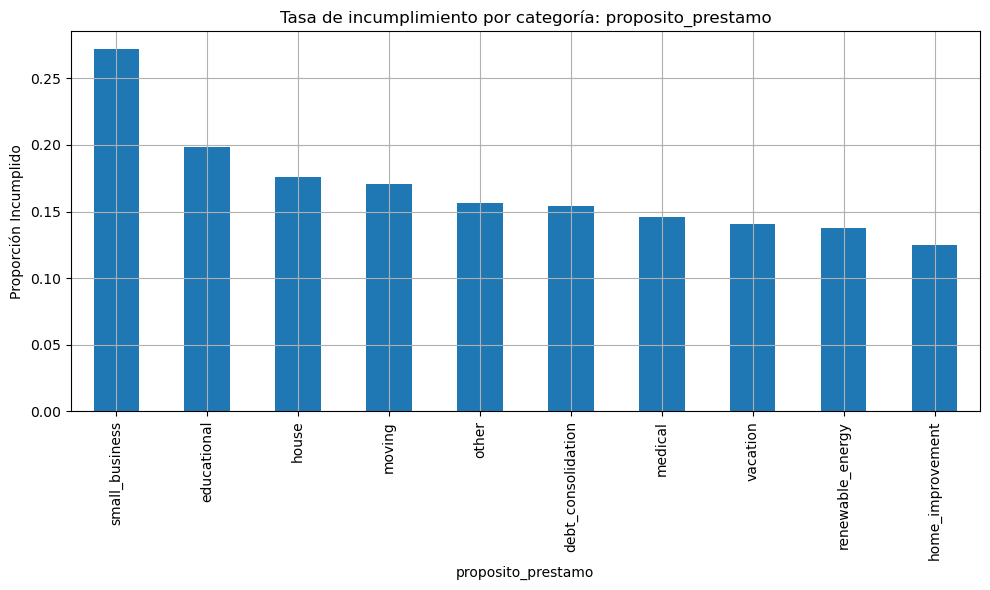

proposito_prestamo
small_business       0.2718
educational          0.1988
house                0.1761
moving               0.1709
other                0.1564
debt_consolidation   0.1544
medical              0.1457
vacation             0.1407
renewable_energy     0.1373
home_improvement     0.1249
Name: target_bin, dtype: float64

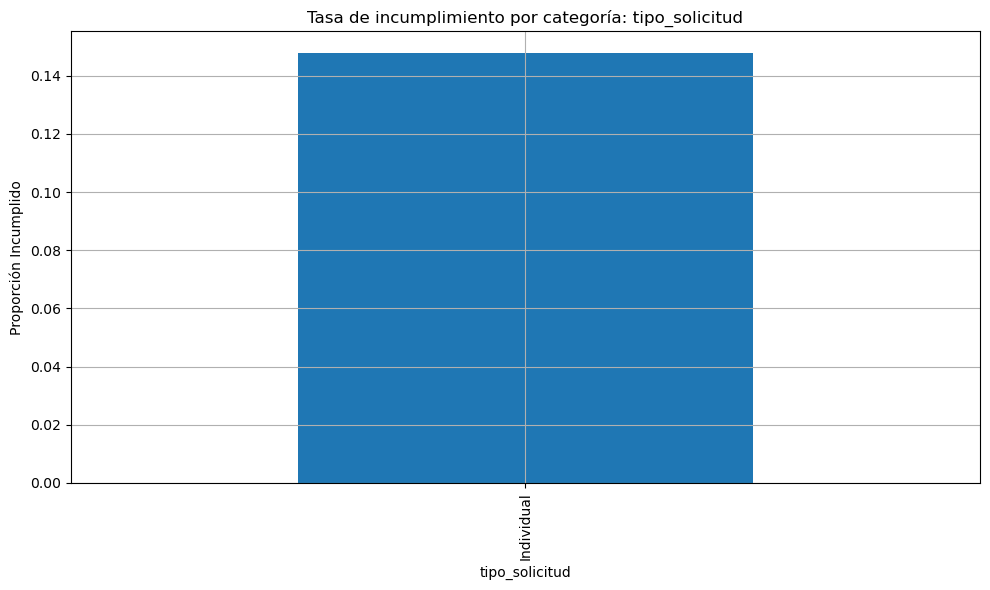

tipo_solicitud
Individual   0.1479
Name: target_bin, dtype: float64

In [687]:
bivar_cat_cols = [
    "grado_crediticio",
    "tenencia_vivienda",
    "verificacion_ingresos",
    "proposito_prestamo",
    "tipo_solicitud"
]

for col in bivar_cat_cols:
    if col in df_clean.columns:
        event_rate_cat = df_clean.groupby(col)["target_bin"].mean().sort_values(ascending=False)

        plt.figure()
        event_rate_cat.head(10).plot(kind="bar")

        plt.title(f"Tasa de incumplimiento por categoría: {col}")
        plt.ylabel("Proporción Incumplido")

        save_fig(f"08_eventrate_cat_{col}.png")
        plt.show()

        display(event_rate_cat.head(10))


## **Default Rate: doble eje**

In [688]:
def plot_default_rate_with_volume(df, col, target_bin="target_bin", top_n=10):

    summary = (
        df.groupby(col)[target_bin]
        .agg(["mean", "count"])
        .sort_values("mean", ascending=False)
        .head(top_n)
    )

    plt.figure()

    # Barra: default rate
    summary["mean"].plot(kind="bar")

    plt.ylabel("Tasa de Incumplimiento")

    # Segundo eje: volumen
    ax2 = plt.twinx()
    summary["count"].plot(kind="line", marker="o")

    ax2.set_ylabel("Número de Observaciones")

    plt.title(f"Tasa de incumplimiento + volumen: {col}")

    save_fig(f"10_default_rate_volume_{col}.png")
    plt.show()

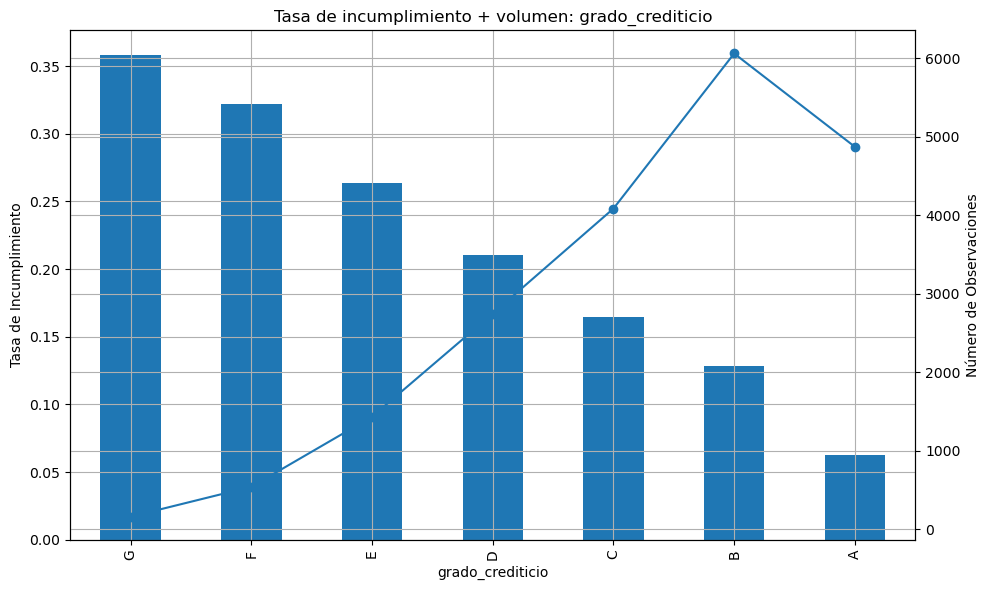

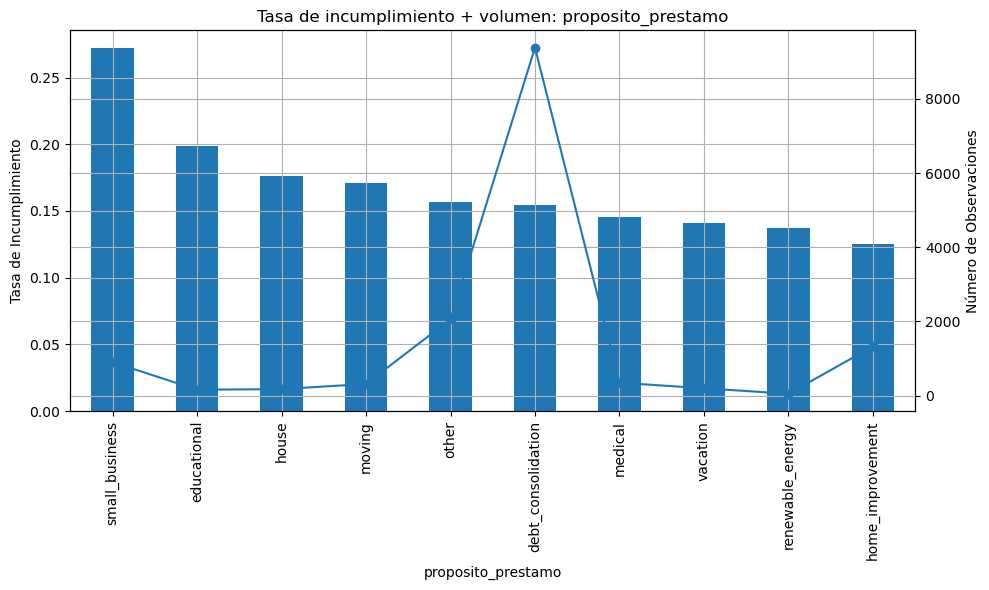

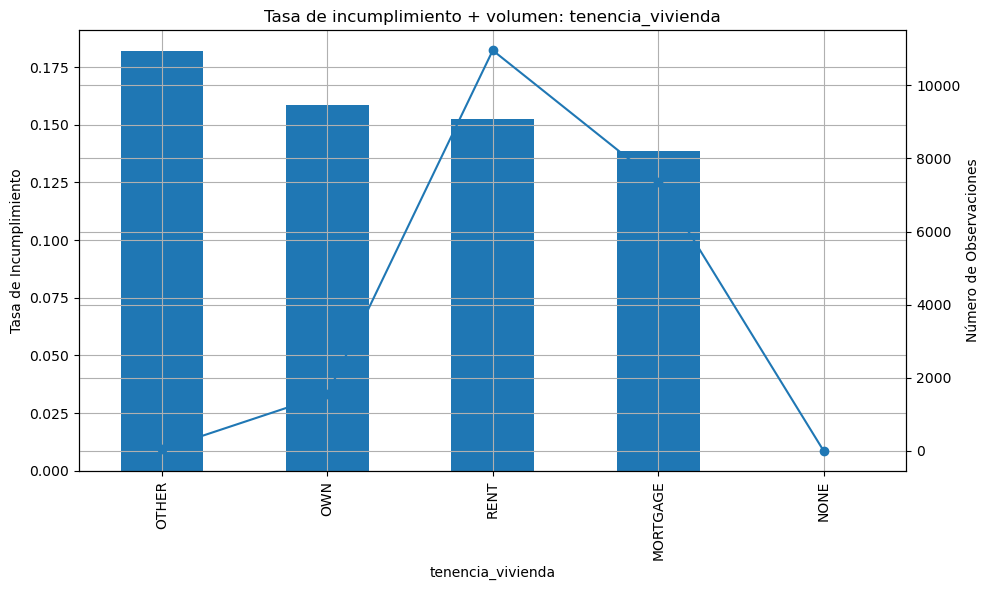

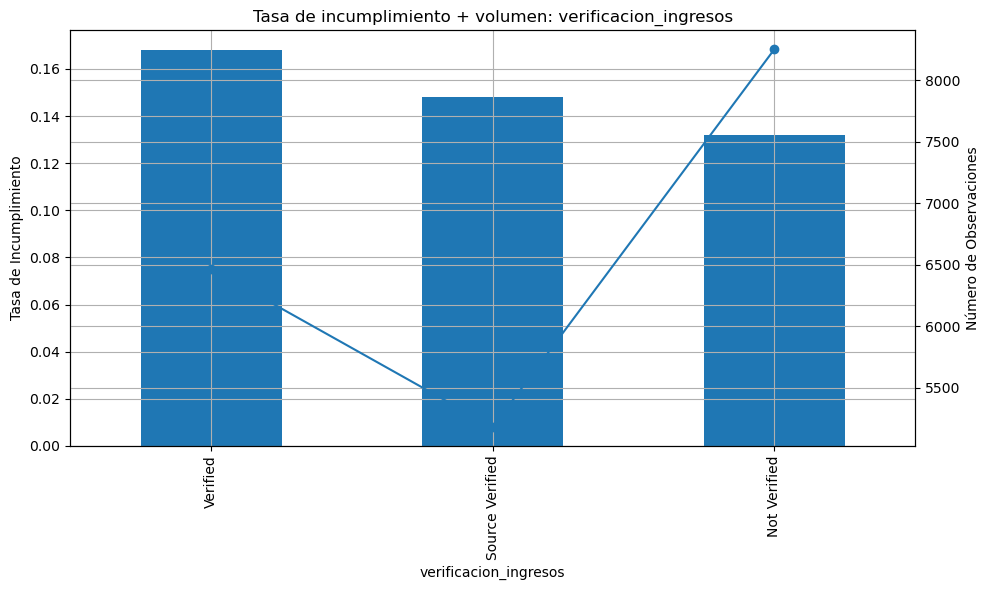

In [689]:
plot_default_rate_with_volume(df_clean, "grado_crediticio")
plot_default_rate_with_volume(df_clean, "proposito_prestamo")
plot_default_rate_with_volume(df_clean, "tenencia_vivienda")
plot_default_rate_with_volume(df_clean, "verificacion_ingresos")

## **Estado de residencia vs Target**

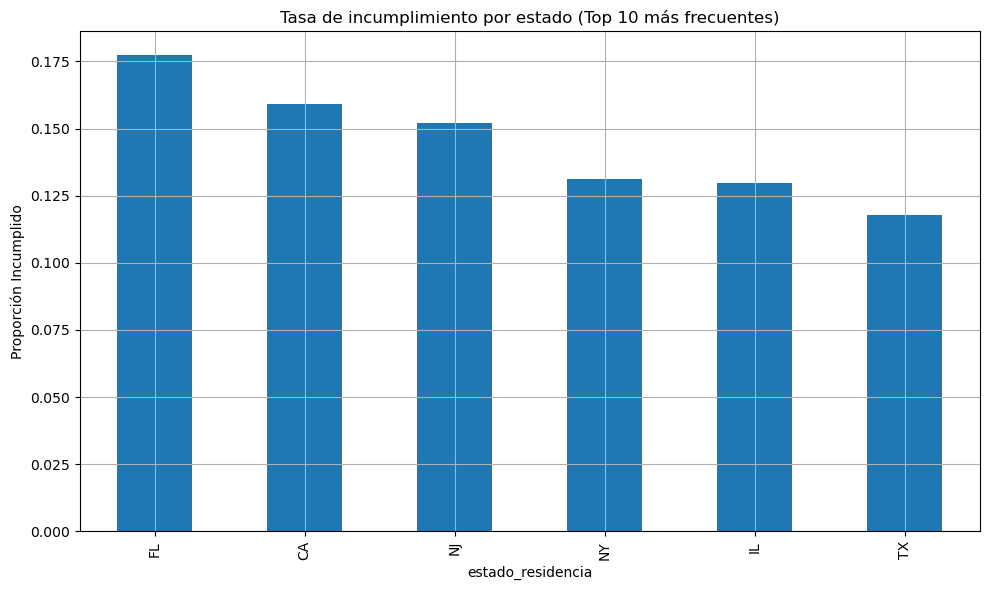

estado_residencia
CA   0.1593
NY   0.1314
FL   0.1774
TX   0.1178
NJ   0.1520
IL   0.1298
Name: target_bin, dtype: float64

In [690]:
event_rate_state = df_clean.groupby("estado_residencia")["target_bin"].mean()

top_states = df_clean["estado_residencia"].value_counts().head(10).index
event_rate_state = event_rate_state.loc[top_states]

plt.figure()
event_rate_state.sort_values(ascending=False).plot(kind="bar")

plt.title("Tasa de incumplimiento por estado (Top 10 más frecuentes)")
plt.ylabel("Proporción Incumplido")

save_fig("09_eventrate_estado_residencia.png")
plt.show()

display(event_rate_state)
